                        file_name
label                            
advertisement               19963
budget                      20010
email                       19954
file folder                 20022
form                        19957
handwritten                 20034
invoice                     19947
letter                      20106
memo                        19975
news article                20011
présentation                20043
questionnaire               20048
resume                      20037
scientific publication      19902
scientific report           19994
specification               19997


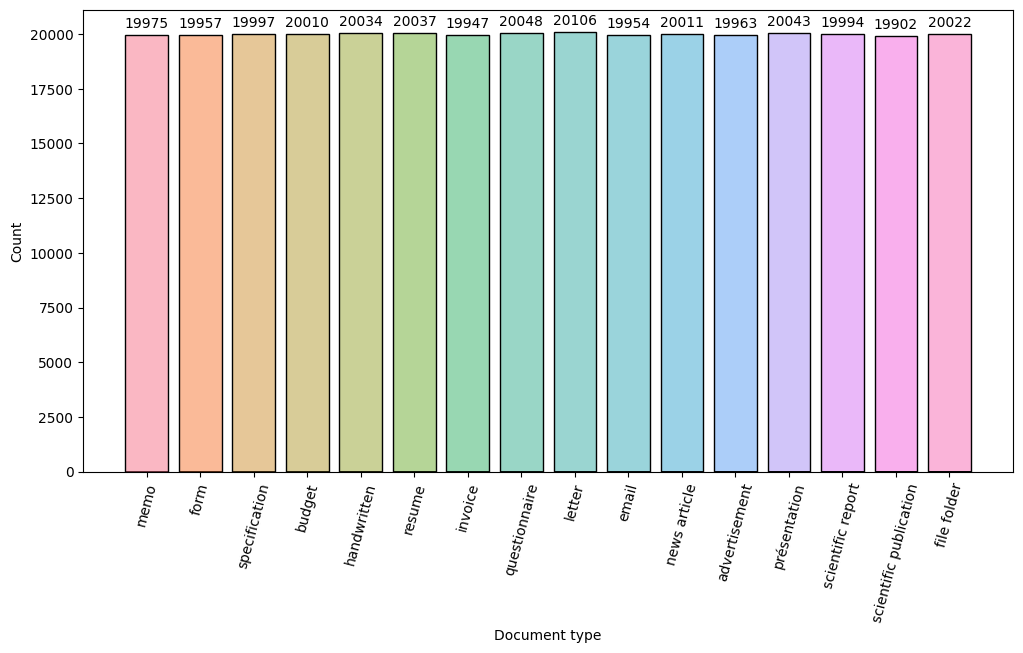

In [2]:
import sys
sys.path.append('../tools')
from tools import *
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


labels = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "présentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

df = read_labels_from_txt('../data/labels/train.txt')
df['label'] = df['label'].map(labels);

print(df.groupby('label').count())

plt.figure(figsize=(12, 6));
ax = sns.histplot(df, x='label', hue='label', discrete=True, binwidth=0.5, shrink=0.8, legend=False);
plt.xlabel('Document type'); # Change xlabel to Document type
plt.xticks(rotation=75);  # Set inclination for the x labels

for container in ax.containers:
    # Get heights and filter out zeros
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, padding=3)

plt.show()


In [ ]:

df = add_image_shape_to_df(df)

Total time elapsed:  429.8834533691406
-----------------------------------



In [11]:
q_low = df['width'].astype(int).quantile(0.005)
q_high = df['width'].astype(int).quantile(0.995)
filtered_widths = df[(df['width'].astype(int) >= q_low) & (df['width'].astype(int) <= q_high)]
display(filtered_widths.describe())
pd.to_pickle(filtered_widths, 'data/filtered_widths.pkl')

,file_name,label,width,height
count,316860,316860,316860,316860
unique,316860,16,194,1
top,imagesp/p/j/x/pjx11d00/518223252+-3253.tif,letter,754,1000
freq,1,20063,149562,316860


In [ ]:
reduced=df.drop('file_name',axis=1)

table = reduced.groupby('label').agg(['mean', 'min', 'max']).style.set_caption("Width and Height Statistics")
display(table)

np.float64(766.37698125)

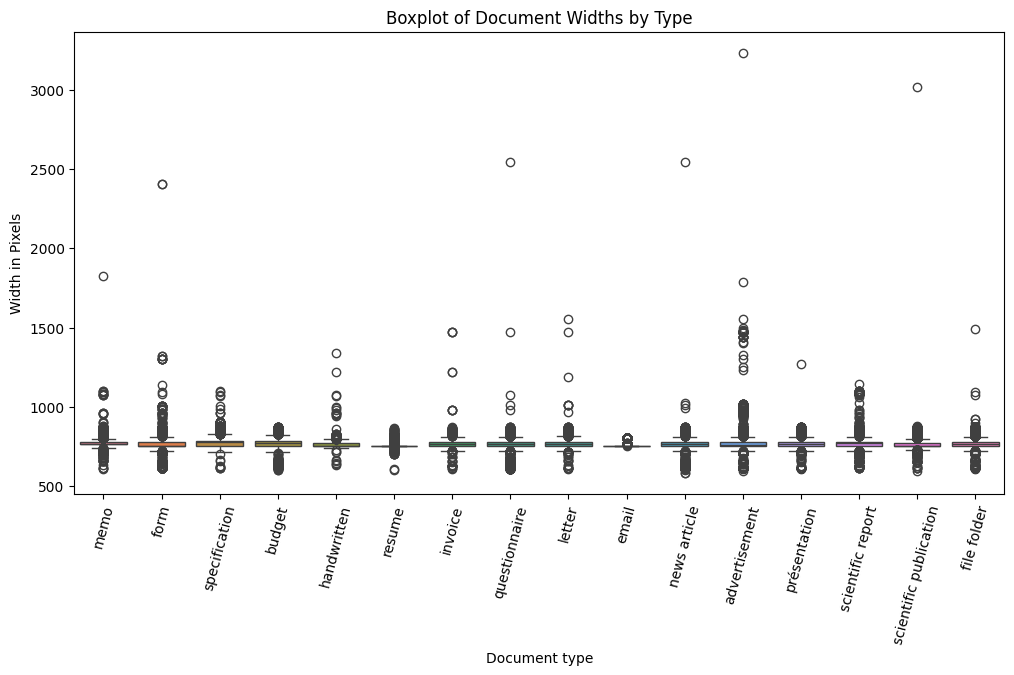

np.float64(766.261863283469)

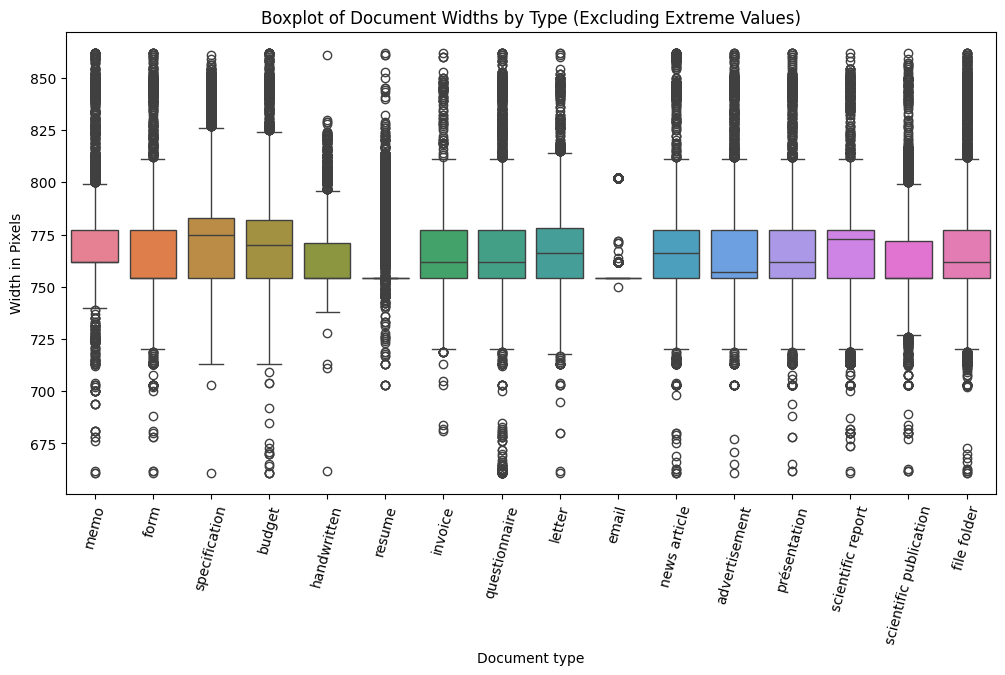

In [4]:
# First graph
widths = reduced.drop('height', axis=1)

display(widths['width'].mean())
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='width', data=widths, hue='label')
plt.xticks(rotation=75)
plt.xlabel('Document type')
plt.ylabel('Width in Pixels')
plt.title('Boxplot of Document Widths by Type')
plt.show()

# Second graph excluding extreme values
q_low = widths['width'].astype(int).quantile(0.005)
q_high = widths['width'].astype(int).quantile(0.995)
filtered_widths = widths[(widths['width'].astype(int) >= q_low) & (widths['width'].astype(int) <= q_high)]

display(filtered_widths['width'].mean())
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='width', data=filtered_widths, hue='label')
plt.xticks(rotation=75)
plt.xlabel('Document type')
plt.ylabel('Width in Pixels')
plt.title('Boxplot of Document Widths by Type (Excluding Extreme Values)')
plt.show()

,label,width
count,316860,316860
unique,16,194
top,letter,754
freq,20063,149562


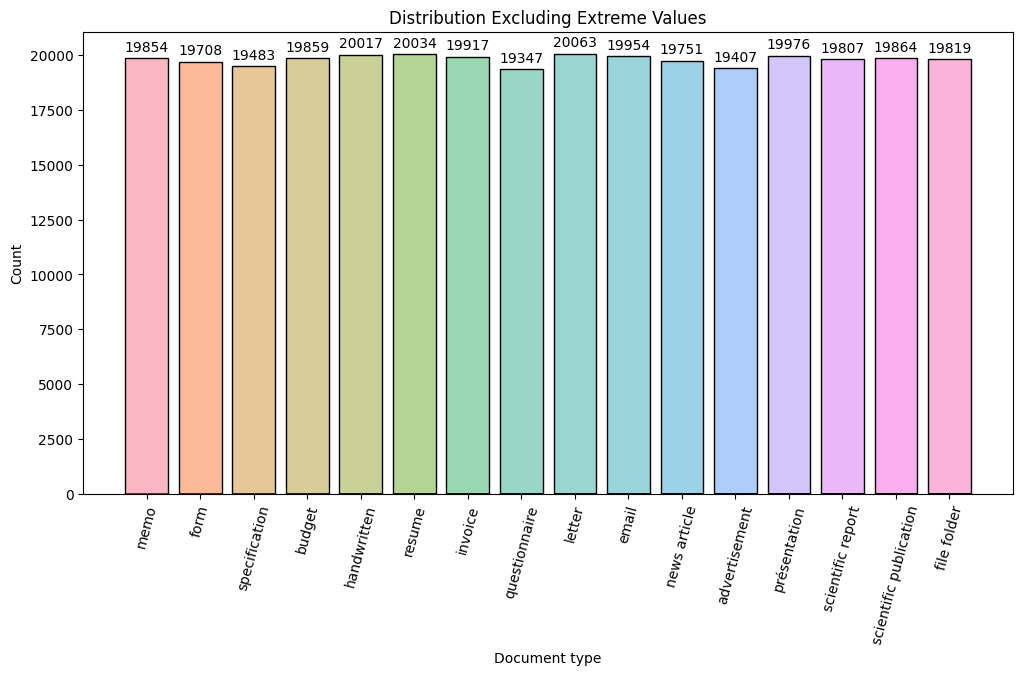

In [5]:
display(filtered_widths.groupby('label').agg(['mean', 'min', 'max','count']).style.set_caption("Width Statistics (Excluding Extreme Values)"))
display(filtered_widths.describe())

plt.figure(figsize=(12, 6))
ax = sns.histplot(filtered_widths, x='label', hue='label', discrete=True, binwidth=0.5, shrink=0.8, legend=False)
plt.xlabel('Document type')  # Change xlabel to Document type
plt.xticks(rotation=75)  # Set inclination for the x labels
plt.title('Distribution Excluding Extreme Values')  # Add title

for container in ax.containers:
    # Get heights and filter out zeros
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, padding=3)

plt.show()


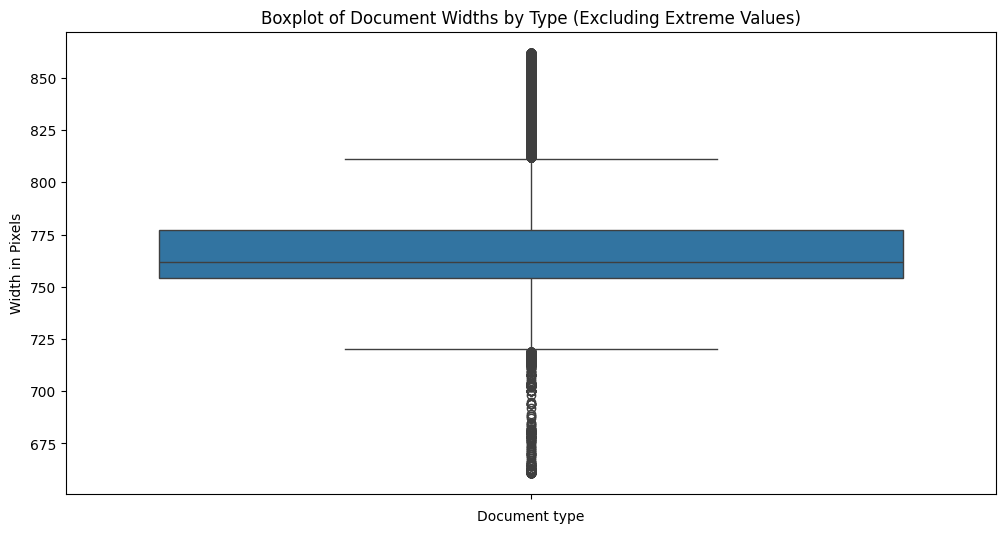

In [6]:
filtered_widths
plt.figure(figsize=(12, 6))
sns.boxplot(y='width', data=filtered_widths)
plt.xticks(rotation=75)
plt.xlabel('Document type')
plt.ylabel('Width in Pixels')
plt.title('Boxplot of Document Widths by Type (Excluding Extreme Values)')
plt.show()

In [7]:
mean_width = filtered_widths['width'].astype(int).mean()
median_width = filtered_widths['width'].astype(int).median()

display(filtered_widths['width'].describe())
print(f"Mean width: {mean_width}")
print(f"Median width: {median_width}")

count     316860
unique       194
top          754
freq      149562
Name: width, dtype: int64

Mean width: 766.261863283469
Median width: 762.0
